<a href="https://colab.research.google.com/github/Manou-Codeur/Firebase-Form-HOC/blob/master/Me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import scipy
from scipy import optimize as opt

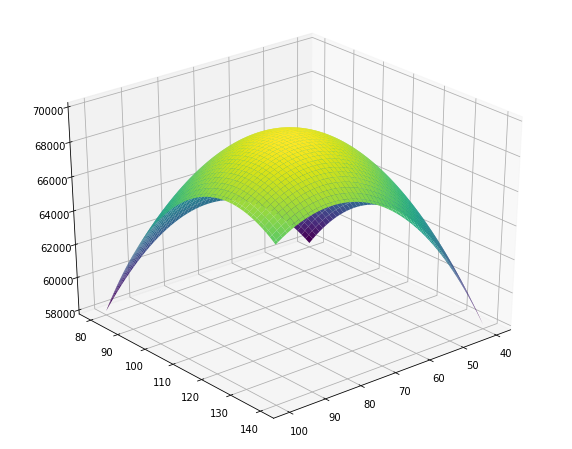

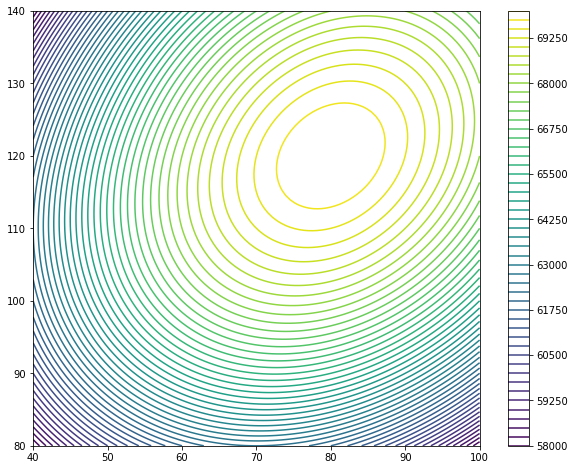

In [80]:
#Vu que l'algorithme de descente sert uniquement à trouver des minimums et qu'on cherche le maximum donc on fait f(x,y) = -f(x,y)
#On utilisera la fonction minus_f(x) pour le calcul d'extrema avec et sans contrainte.Le min obtenu sera donc en réalité notre max et f(min)=-f(max)
def minus_f(x):
    return -(500*x[0] + 1000*x[1] - 5*x[1]**2 - 5*x[0]**2 + (5/2)*x[0]*x[1]- 10000)
def f(x):
    return 500*x[0] + 1000*x[1] - 5*x[1]**2 - 5*x[0]**2 + (5/2)*x[0]*x[1]- 10000    

# construction du maillage sur [40, 100]x[80, 140]
#On a choisi ce maillage car il est adapté aux résultats obtenus lors du calcul des extremas.
x = np.linspace(40, 100,num=100)
y = np.linspace(80,140,num=100)
X,Y = np.meshgrid(x,y)

# evaluation de la fonction sur le maillage en utilisant la fonctions initial f(x,y)
Z = f([X,Y])

# graphe de la fonction
#La fonction est quadratique , a coefficients négatifs , le graphe semble donc cohérent.
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap = 'viridis')
ax.view_init(30,50)

# affichage des contours
fig = plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 55)
plt.colorbar()

In [81]:
#Gradient et Matrice hessienne
#Les fonctions grad et Hess sont verifiées vu que les résultats obtenus coincident avec nos calculs.
A = np.array([[-5, 5/4], [5/4, -5]])
b = np.array([[500], [1000]])

y = np.array([[80],[120]])

def grad(A,b,x):
  return (A + A.T)@ x + b

def Hess(A):
  return A + A.T

print(grad(A, b, y))   
print(Hess(A))


[[0.]
 [0.]]
[[-10.    2.5]
 [  2.5 -10. ]]


      fun: -69999.99999998015
 hess_inv: array([[0.112741  , 0.02609174],
       [0.02609174, 0.10210882]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([ 80.00005392, 119.99997824])
-- 
 xmin = [ 80.00005392 119.99997824]
-- 
 fmin = -69999.99999998015


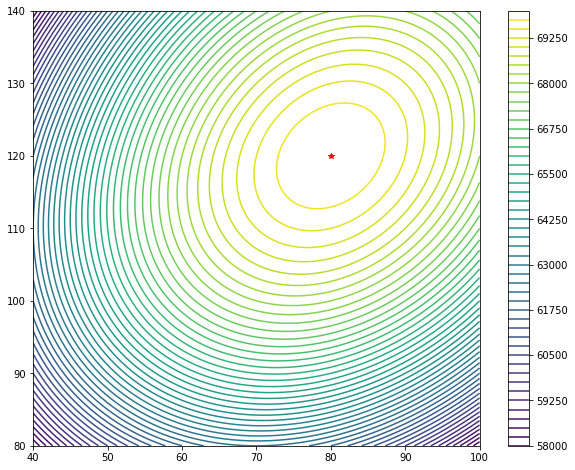

In [82]:
#calcul des extrema sans contrainte
x0 = [10, 50]
res = opt.minimize(minus_f, x0)

print(res)
print('-- \n xmin =',res.x)
print('-- \n fmin =',res.fun)

#Affichage des extrema
fig = plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 55)
plt.plot(res.x[0], res.x[1], "r*")
plt.colorbar()

     fun: -65312.49999998434
     jac: array([-187.5       , -187.49902344])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([54.99996458, 95.00003542])
-- 
 xmin = [54.99996458 95.00003542]
-- 
 fmin = -65312.49999998434


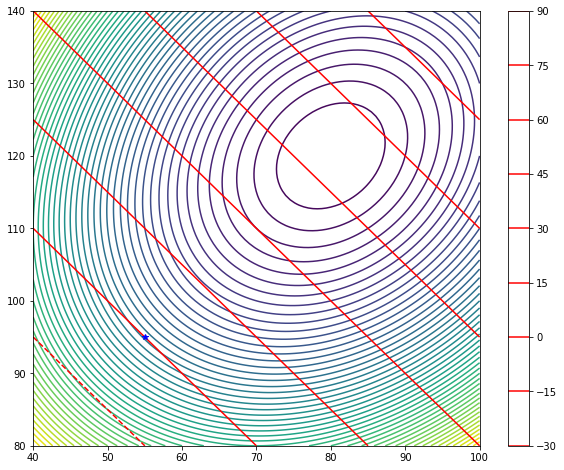

In [83]:
# les extrema sous contrainte 

# evaluation de la fonction sur le maillage en utilisant la fonctions -f(x,y) qu'on appelle minus_f
Z = minus_f([X,Y])

#La contrainte
def phi(x) :
    return x[0] + x[1] - 150
cons = ({'type':  'eq', 'fun': lambda x: phi(x)})

# calcul des extrema avec contrainte
x0 = [25,75]
resc = opt.minimize(minus_f, x0, method = 'SLSQP', constraints=cons)

print(resc)
print('-- \n xmin =',resc.x)
print('-- \n fmin =',resc.fun)

# affichage des extrema
plt.figure(figsize=(10, 8))
plt.contour(X,Y,Z, 55)
plt.plot(resc.x[0],resc.x[1], 'b*')
plt.contour(X,Y,phi([X,Y]), colors='red')
plt.colorbar()